# Implementation of Kaczmarz algorithm for updating the expansion coefficients
#  in a Polynomial regression

## Multiple Input  - Single Output

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random
from sklearn.preprocessing import PolynomialFeatures

#New! for Legendre
from scipy.special import legendre
from sklearn.metrics import r2_score #for r-squared

In [3]:
## Function to generate polynomial features using monomial basis functions
## This function can be also defined using a for loop and plain NumPy

def generate_design_matrix_from_1D_data(x_initial,polynomial_order):
    """
    Input: 
    x_initial: shape=(N,) where 'N' is the number of samples
    polynomial_order: scalar: the order of polynomial you want to fit to the data
    
    ouput: design_matrix: shape=(N,polynomial_order+1)
    """
    # Check if x_initial is a scalar
    if np.isscalar(x_initial):
        # If it is, convert it to a numpy array
        x_initial = np.array([x_initial])
    elif isinstance(x_initial, list):
        # If it is a list, convert it to a numpy array
        x_initial = np.array(x_initial)

        
    
    # Generate the polynomial features using sklearn_preprocessing package
    poly_features=PolynomialFeatures(degree=polynomial_order)

    # Update the design matrix using the polynomial features created in the previous step
    design_matrix=poly_features.fit_transform(x_initial.reshape(-1,1))

    return design_matrix

In [4]:
def generate_legendre_design_matrix(x_initial, polynomial_order):
    # If x_initial is a single number, convert it to a numpy array
    if np.isscalar(x_initial):
        x_initial = np.array([x_initial])
        
    N = len(x_initial)
    design_matrix = np.ones((N, polynomial_order + 1), dtype='float64')
    
    for j in range(polynomial_order + 1):
        P_j = legendre(j)
        for i in range(N):
            design_matrix[i, j] = P_j(x_initial[i])
            
    return design_matrix

In [5]:
def legendre_polynomials(x_values):
    results = []
    for x in x_values:
        P0 = 1
        P1 = x
        P2 = (-1 + 3*x**2) / 2
        P3 = (-3*x + 5*x**3) / 2
        P4 = (3 - 30*x**2 + 35*x**4) / 8
        results.append((P0, P1, P2, P3, P4))
    return np.array([results])

In [6]:
x_initial = np.linspace(-1, 1, 100)
polynomial_order = 4

monomial_matrix = generate_design_matrix_from_1D_data(x_initial, polynomial_order)
# print('monomial_matrix: ', monomial_matrix)

print('legendre_polynomials: ', legendre_polynomials(x_initial))
legendre_matrix = generate_legendre_design_matrix(x_initial, polynomial_order)
print('legendre_matrix: ', legendre_matrix)

legendre_polynomials:  [[[ 1.         -1.          1.         -1.          1.        ]
  [ 1.         -0.97979798  0.94000612 -0.88182818  0.80701898]
  [ 1.         -0.95959596  0.88123661 -0.76965451  0.63154792]
  [ 1.         -0.93939394  0.82369146 -0.66335532  0.47274734]
  [ 1.         -0.91919192  0.76737068 -0.56280693  0.32979526]
  [ 1.         -0.8989899   0.71227426 -0.46788567  0.20188717]
  [ 1.         -0.87878788  0.6584022  -0.37846787  0.08823606]
  [ 1.         -0.85858586  0.60575451 -0.29442986 -0.01192758]
  [ 1.         -0.83838384  0.55433119 -0.21564796 -0.09935581]
  [ 1.         -0.81818182  0.50413223 -0.1419985  -0.17478314]
  [ 1.         -0.7979798   0.45515764 -0.0733578  -0.23892665]
  [ 1.         -0.77777778  0.40740741 -0.00960219 -0.2924859 ]
  [ 1.         -0.75757576  0.36088154  0.04939199 -0.33614296]
  [ 1.         -0.73737374  0.31558004  0.10374843 -0.37056243]
  [ 1.         -0.71717172  0.27150291  0.1535908  -0.39639139]
  [ 1.         -0

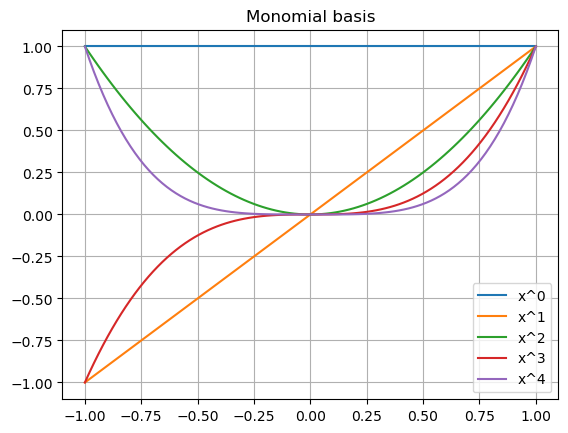

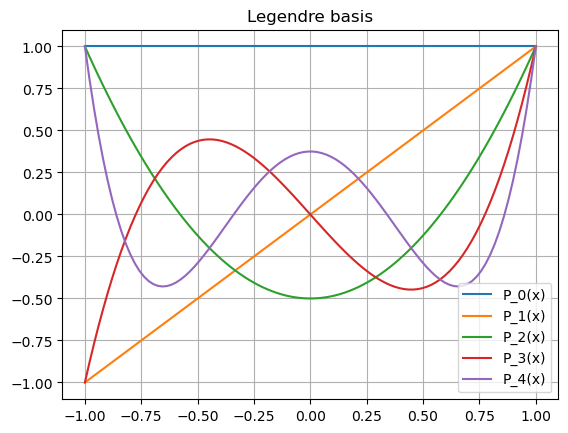

In [7]:
# Plot monomial polynomials
for j in range(polynomial_order + 1):
    plt.plot(x_initial, monomial_matrix[:, j], label=f"x^{j}")
plt.title("Monomial basis")
plt.legend()
plt.grid(True)
plt.show()

# Plot Legendre polynomials
for j in range(polynomial_order + 1):
    plt.plot(x_initial, legendre_matrix[:, j], label=f"P_{j}(x)")
plt.title("Legendre basis")
plt.legend()
plt.grid(True)
plt.show()


# Multiple Input  - Single Output

In [29]:
def online_kaczmarz_legendre_multiple_input(input_data, target_values, polynomial_degree, input_indices, weights=None):

    
    beta_parameter = 0
    
    if weights is None:
        weight_predictions = np.random.rand(polynomial_degree+1) #polynomial order starting from 0
    else:
       weight_predictions = weights


    y = target_values # scalar, the y that corresponds to the observed x
    # print('y: ', y.shape)


    for i in range (input_data.shape[0]):
            for j in range(polynomial_degree+1):
                x = generate_legendre_design_matrix(input_data[:,input_indices[j]], polynomial_degree)
                a = x[-1,:]
                
                weight_predictions = weight_predictions + ((y[i] - np.dot(a, weight_predictions)) / np.linalg.norm(a)**2) * a.T

                # This is for beta

                # residual_errors = target_values - design_matrix @ weight_predictions
                # sse = residual_errors.T @ residual_errors
                # beta_parameter = sse / ( - polynomial_order)

    return weight_predictions, beta_parameter

In [30]:
# Generate random design matrix and target values
np.random.seed(14)  # for reproducibility
design_matrix_ = np.random.rand(10, 2)  # 10 samples, 2 input vectors
target_values = np.random.rand(10)

# Set polynomial degree
polynomial_degree = 3
input_indices = [0, 0, 1, 0]

# Call the function
weight_predictions, beta_parameter = online_kaczmarz_legendre_multiple_input(design_matrix_, target_values, polynomial_degree, input_indices,)
print('weight_predictions: ', weight_predictions)

weight_predictions:  [ 0.36530164 -0.31048627  0.5621633   0.09310512]


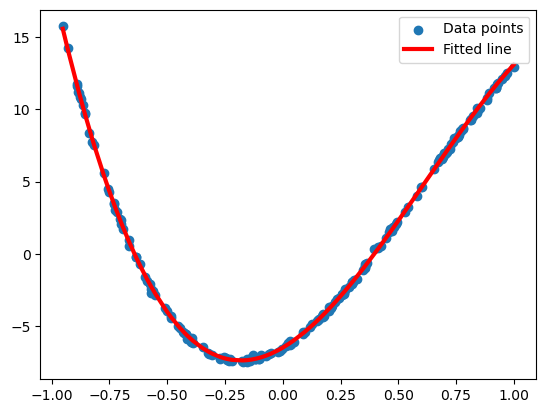

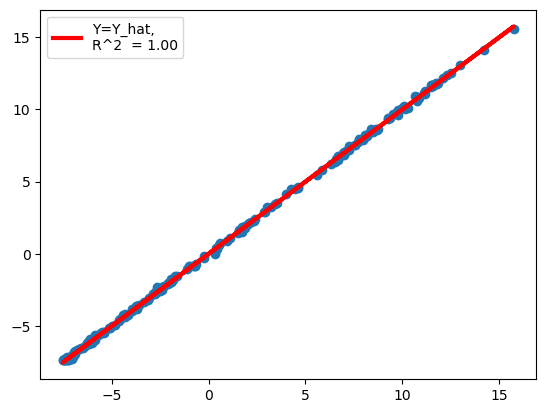

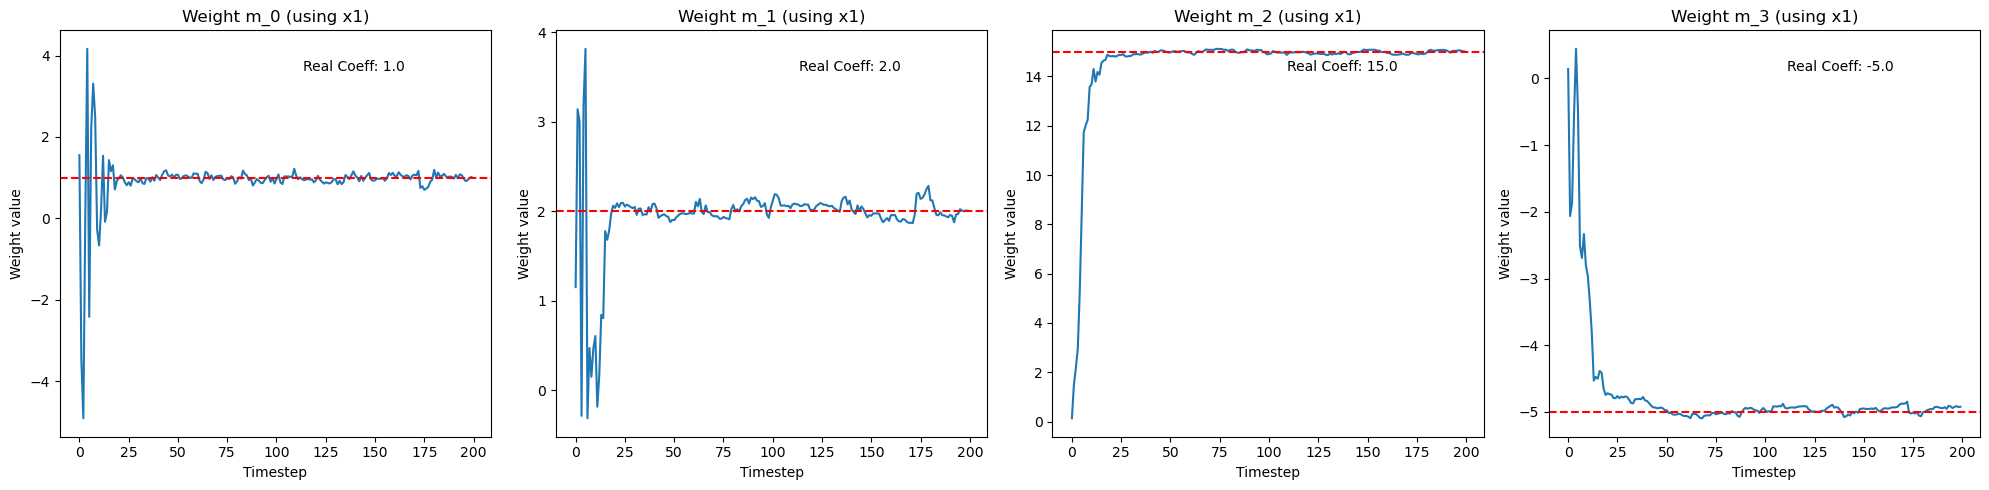

In [50]:

################################################################################################
####    Definition of "Hyperparameters"
################################################################################################

t = 200 # Number of points to be generated, and times the coefficients will be updated.
        # The coefficients w are calculatd for each of these points, the idea is to simulate an on-line stream of data. 

# Generate all x upfront
"""
    Update this if planning on using more input variables, # the function should be able to handle more than 2
"""
X = 2 * np.random.rand(t, 2) - 1
x1, x2 = X[:, 0], X[:, 1]                 

polynomial_degree = 3

# Legendre Polynomials
P_0 = 1
P_1 = x1
P_2 = 1/2 * (3*x1**2 - 1)
P_3 = 1/2 * (5*x1**3 - 3*x1)

# Argument that indicates the function what input variable (x1, x2, ...) corresponds to what polynomial P_n
"""
    Update the input indices accordingly!
    0 --> x1
    1 --> x2
    and so on
"""
input_indices = [0, 0, 0, 0]

real_coeffs   = [1, 2, 15, -5]    # These are the real coefficients, what the estimated w should converge to. 

# Generate Y as target_values (real Y's)
noise = np.random.normal(scale= 0.1 , size=(t))
target_values = real_coeffs[0] * P_0 + real_coeffs[1] * P_1 + real_coeffs[2] * P_2 + real_coeffs[3] * P_3 + noise



# Initialize weights 
weights_over_time = []


################################################################################################
####    Online estimation of coefficients
################################################################################################


for i in range(X.shape[0]):
    if i == 0:
        weight_predictions, _ = online_kaczmarz_legendre_multiple_input(X[i,:].reshape(1, -1), np.array([target_values[i]]), polynomial_degree, input_indices)
    else:
        weight_predictions, _ = online_kaczmarz_legendre_multiple_input(X[i,:].reshape(1, -1), np.array([target_values[i]]), polynomial_degree, input_indices, weight_predictions)
    
    weights_over_time.append(weight_predictions)

weights_over_time = np.array(weights_over_time)


################################################################################################
####    Results
################################################################################################

x_ = x1

# Use last predicted weights to compute y_hat
weights = weights_over_time[-1]
y_hat = generate_legendre_design_matrix(x_, polynomial_degree) @ weights.T



################################################################################################
####    Plots and graphs
################################################################################################


# Sort the data by x
sort_indices = np.argsort(x_[:])
x_sorted = x_[sort_indices]
y_hat_sorted = y_hat[sort_indices]

# Plot the fitted line
plt.scatter(x_, target_values, label='Data points')
plt.plot(x_sorted, y_hat_sorted, color='red', linewidth = 3, label='Fitted line')
plt.legend()
plt.show()

# Plot the accuracy
r2 = r2_score(target_values, y_hat)
plt.scatter(target_values, y_hat)
plt.plot(target_values, target_values, color='red', linewidth = 3, label=f'Y=Y_hat, \nR^2  = {r2:.2f}')
plt.legend() 
plt.show()

# Create a grid of horizontal subplots, one for each weight
fig, axs = plt.subplots(ncols=polynomial_degree+1, figsize=(20, 5))

for i in range(polynomial_degree+1):
    axs[i].plot(weights_over_time[:, i])
    axs[i].set_title(f'Weight m_{i} (using x{input_indices[i]+1})')
    mean_value = real_coeffs[i]
    axs[i].axhline(y=mean_value, linestyle='dashed', color='red')
    axs[i].text(0.8, 0.9, f"Real Coeff: {mean_value:.1f}", transform=axs[i].transAxes, ha='right')
    axs[i].set_xlabel('Timestep')
    axs[i].set_ylabel('Weight value')

plt.tight_layout()
plt.show()